In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error ,  r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")



In [42]:
df = pd.read_csv(r"C:\Users\Namrata Vasant Borse\Downloads\retail_price.csv")

In [43]:
df.head(20)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.900000,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.900000,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000
5,bed1,bed_bath_table,01-10-2017,3,137.85,15.100000,45.950000,39,161,2,...,89.900000,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000
6,bed1,bed_bath_table,01-11-2017,11,445.85,15.832727,40.531818,39,161,2,...,89.900000,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000
7,bed1,bed_bath_table,01-12-2017,6,239.94,15.230000,39.990000,39,161,2,...,88.488235,3.9,18.898333,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818
8,bed1,bed_bath_table,01-01-2018,19,759.81,16.533684,39.990000,39,161,2,...,86.900000,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000
9,bed1,bed_bath_table,01-02-2018,18,719.82,13.749444,39.990000,39,161,2,...,86.900000,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000


In [44]:
df.describe().sum()

qty                             860.938983
total_price                   18942.644328
freight_price                   841.518028
unit_price                     1516.369772
product_name_lenght             971.141129
product_description_lenght     6947.604424
product_photos_qty              692.914556
product_weight_g              17796.307004
product_score                   700.317524
customers                      1371.083667
weekday                         807.759773
weekend                         729.363884
holiday                         686.434513
month                           715.435763
year                          12782.024885
s                               839.632176
volume                        81149.429069
comp_1                         1397.251961
ps1                             700.981119
fp1                             811.507498
comp_2                         1449.990237
ps2                             700.530710
fp2                             815.646821
comp_3     

In [45]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df.shape

(676, 30)

In [48]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [49]:
le = LabelEncoder()


In [50]:
df['product_category_name'] = le.fit_transform(df['product_category_name'])


In [51]:
df.head(20)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,0,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
1,bed1,0,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.900000,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000
2,bed1,0,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000
3,bed1,0,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000
4,bed1,0,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.900000,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000
5,bed1,0,01-10-2017,3,137.85,15.100000,45.950000,39,161,2,...,89.900000,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000
6,bed1,0,01-11-2017,11,445.85,15.832727,40.531818,39,161,2,...,89.900000,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000
7,bed1,0,01-12-2017,6,239.94,15.230000,39.990000,39,161,2,...,88.488235,3.9,18.898333,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818
8,bed1,0,01-01-2018,19,759.81,16.533684,39.990000,39,161,2,...,86.900000,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000
9,bed1,0,01-02-2018,18,719.82,13.749444,39.990000,39,161,2,...,86.900000,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000


In [52]:
# Define features and target
X = df.drop(columns=['lag_price', 'product_id', 'month_year'])  # Drop non-numeric/categorical IDs and dates
y = df['lag_price']


In [53]:
# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [54]:
# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())  # You can replace SVR with other models
])

In [55]:
df.head(20)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,0,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000
1,bed1,0,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.900000,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000
2,bed1,0,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000
3,bed1,0,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000
4,bed1,0,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.900000,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000
5,bed1,0,01-10-2017,3,137.85,15.100000,45.950000,39,161,2,...,89.900000,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000
6,bed1,0,01-11-2017,11,445.85,15.832727,40.531818,39,161,2,...,89.900000,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000
7,bed1,0,01-12-2017,6,239.94,15.230000,39.990000,39,161,2,...,88.488235,3.9,18.898333,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818
8,bed1,0,01-01-2018,19,759.81,16.533684,39.990000,39,161,2,...,86.900000,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000
9,bed1,0,01-02-2018,18,719.82,13.749444,39.990000,39,161,2,...,86.900000,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000


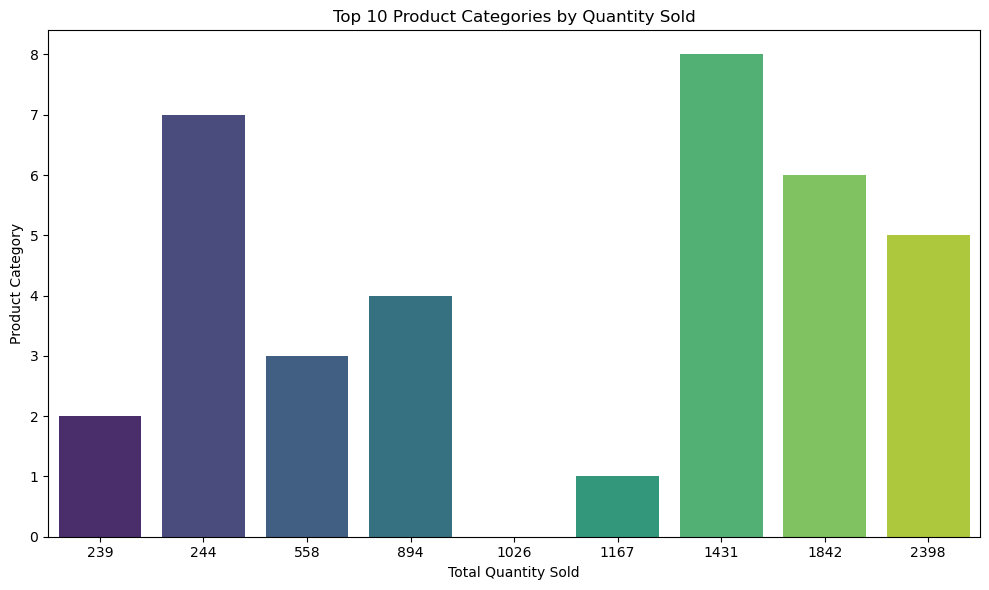

In [56]:
category_qty = df.groupby('product_category_name')['qty'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_qty, x='qty', y='product_category_name', palette='viridis')
plt.title('Top 10 Product Categories by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


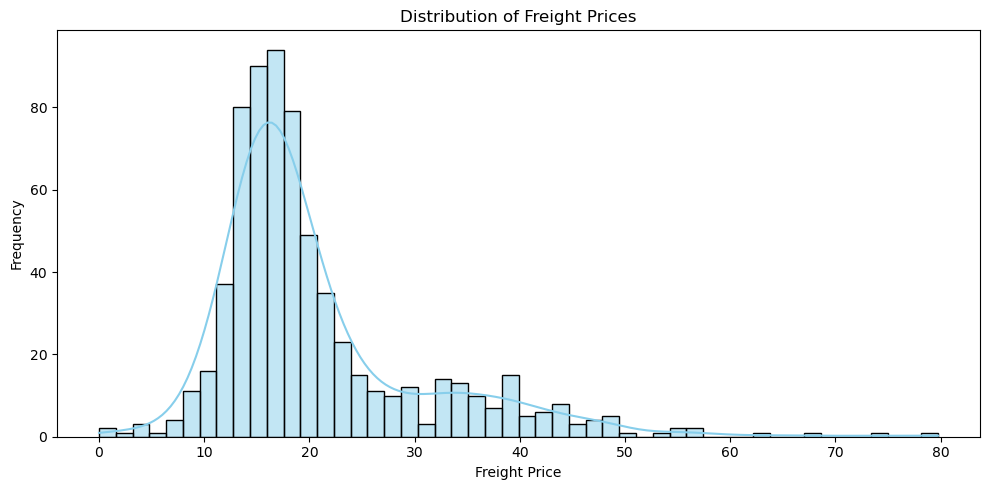

In [57]:
plt.figure(figsize=(10, 5))
sns.histplot(df['freight_price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Freight Prices')
plt.xlabel('Freight Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


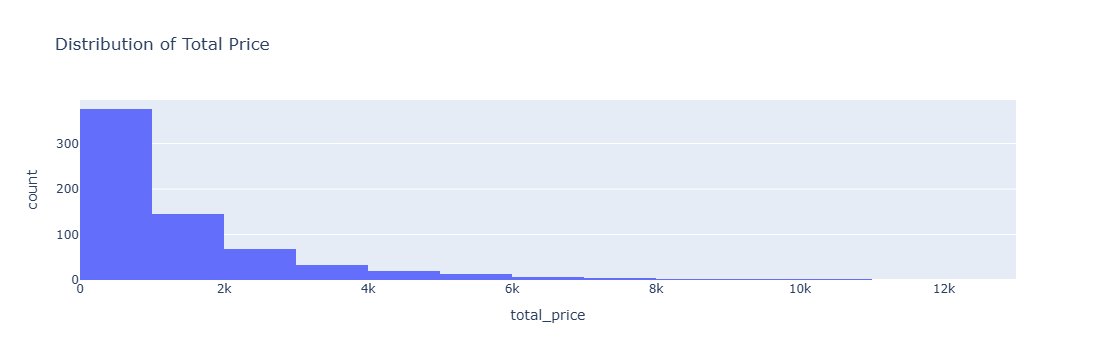

In [58]:
fig = px.histogram(df, x='total_price', nbins=20, title='Distribution of Total Price')
fig.show()

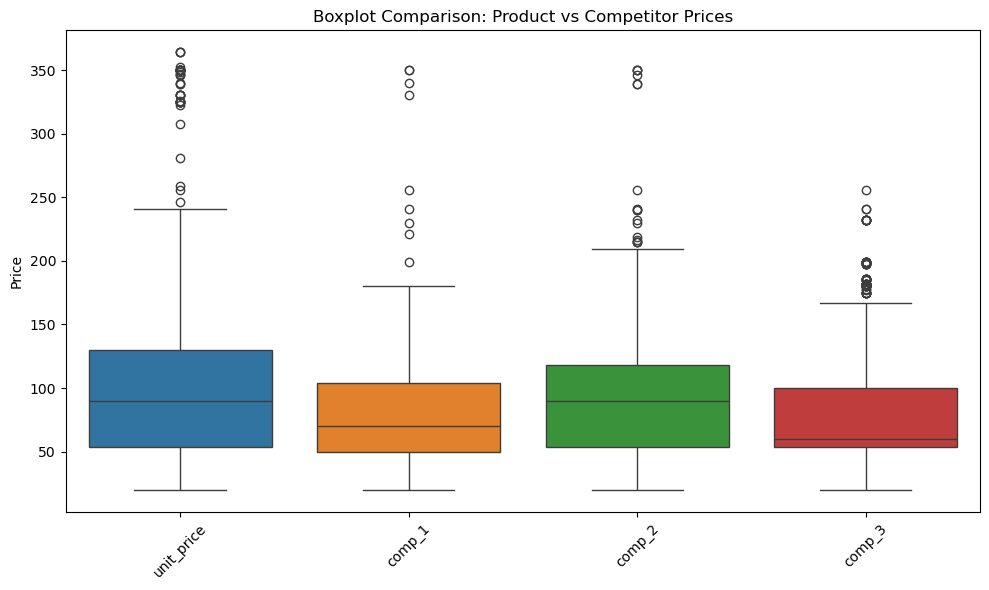

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['unit_price', 'comp_1', 'comp_2', 'comp_3']])
plt.title('Boxplot Comparison: Product vs Competitor Prices')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


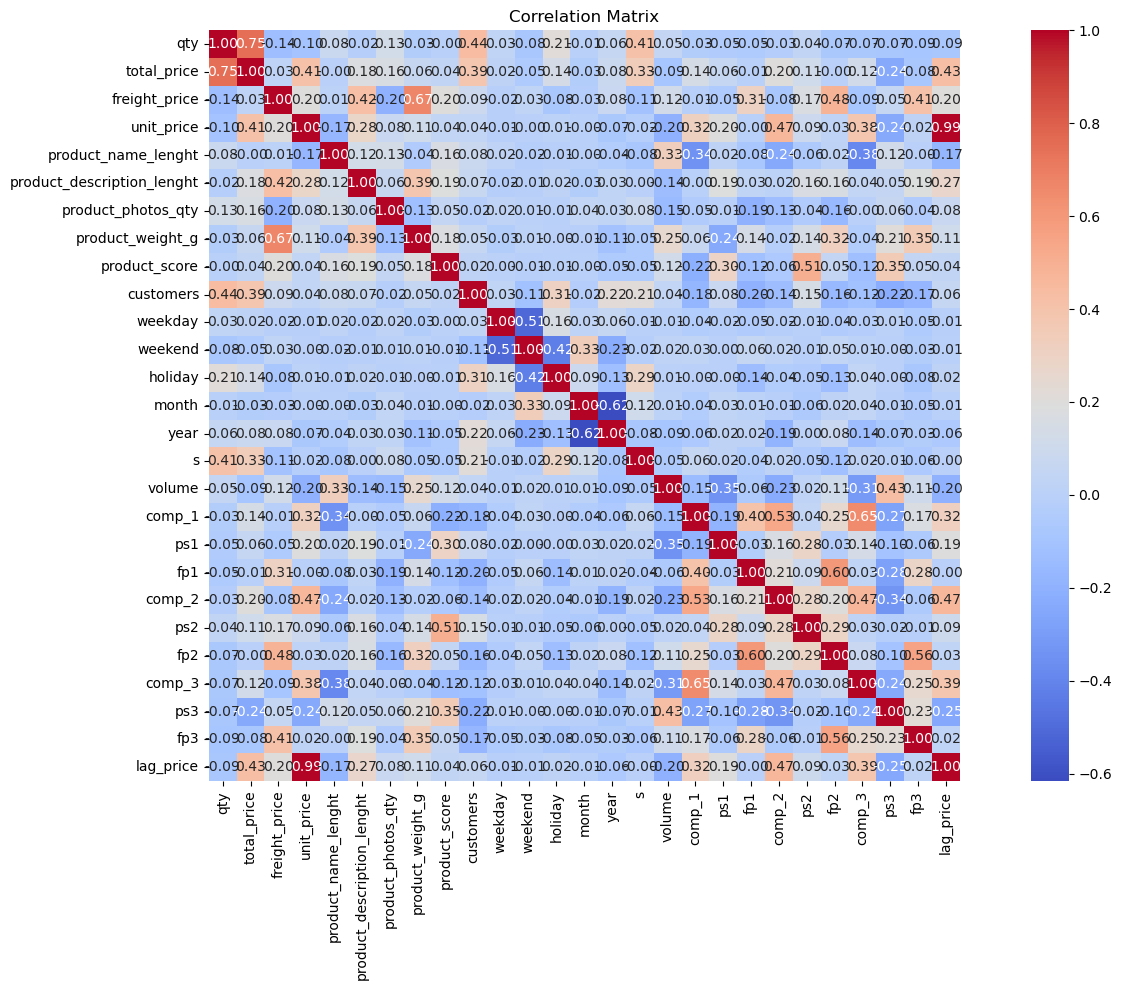

In [60]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [61]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Ridge Regression': Ridge()  
}


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train,y_train)


LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
print(f"\n{LinearRegression()}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


LinearRegression()
R2 Score: 0.99
RMSE: 8.25


In [67]:
model = RandomForestRegressor()

In [68]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
y_pred = model.predict(X_test)

In [70]:
print(f"\n{RandomForestRegressor()}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


RandomForestRegressor()
R2 Score: 0.99
RMSE: 8.18


In [71]:
model = GradientBoostingRegressor()

In [72]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [73]:
y_pred = model.predict(X_test)

In [74]:
print(f"\n{GradientBoostingRegressor()}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


GradientBoostingRegressor()
R2 Score: 0.99
RMSE: 8.06


In [75]:
model = Ridge()

In [76]:
model.fit(X_train,y_train)

Ridge()

In [77]:
y_pred = model.predict(X_test)

In [78]:
print(f"\n{Ridge()}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


Ridge()
R2 Score: 0.99
RMSE: 8.24


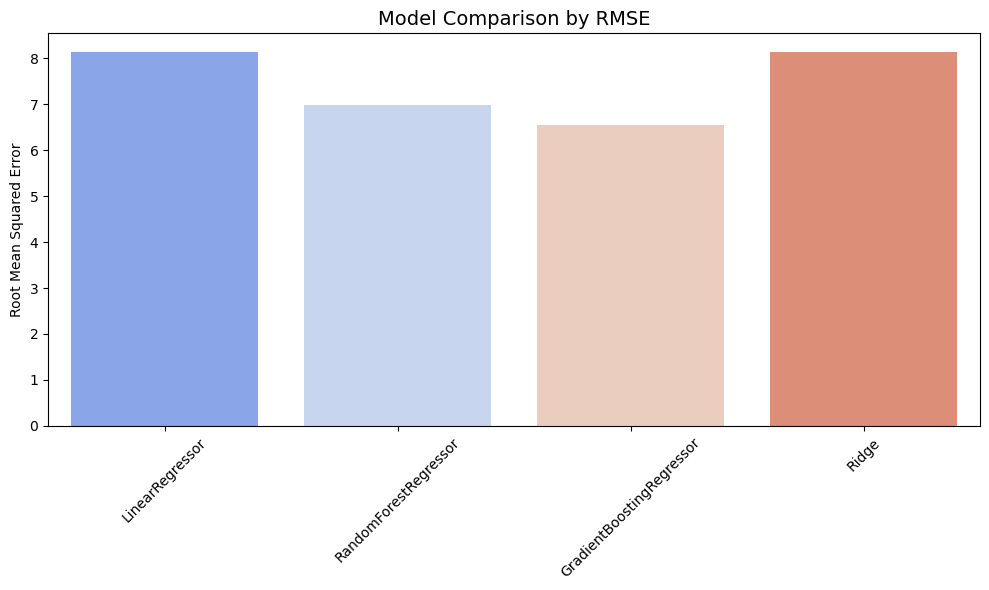

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot( x=('LinearRegressor','RandomForestRegressor','GradientBoostingRegressor','Ridge'), y = (8.14 , 6.98 , 6.55 , 8.13) , palette='coolwarm')
plt.title('Model Comparison by RMSE', fontsize=14)
plt.ylabel('Root Mean Squared Error')  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
# Define the model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Grid search
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# Best model
print("Best alpha:", grid.best_params_['alpha'])
print("Best score:", -grid.best_score_)

Best alpha: 10.0
Best score: 66.42743319099183
